# Retrieving the Dataset

In [1]:
# claiming the dataset
import pandas as pd

cxr_dataset = pd.read_csv("features.csv")
cxr_dataset.head()

,Unnamed: 0,mean0,variance0,skewness0,uniformity0,snr0,mean1,variance1,skewness1,uniformity1,...,variance14,skewness14,uniformity14,snr14,mean15,variance15,skewness15,uniformity15,snr15,label
0,0,70.538724,1909.950095,0.143420,152,1.614049,68.778650,1388.528712,0.120264,148,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
1,1,66.952077,1602.794508,0.181541,155,1.672342,61.578404,1484.367649,0.410992,150,...,0.0,0.0,0,0.0,125.914046,54.891983,0.237026,34,16.994943,COVID-19
2,2,69.270376,1248.788182,0.241287,142,1.960213,52.027166,1237.889062,0.598714,146,...,0.0,0.0,0,0.0,129.789474,34.931755,-0.205727,23,21.959845,COVID-19
3,3,84.922674,1128.341334,-0.566822,129,2.528153,85.117608,938.150288,-0.283189,134,...,0.0,0.0,0,0.0,106.118199,222.640813,-0.205455,60,7.111930,COVID-19
4,4,96.915600,1322.043677,-0.536870,164,2.665452,102.455556,1405.472099,-0.317645,153,...,0.0,0.0,0,0.0,121.989510,474.917139,-0.286981,89,5.597751,COVID-19


# Splitting the dataset to train and test

In [2]:
# Getting the features needed

#get the feature columns
col_features = list(cxr_dataset.columns)
#get the label column
label = list(cxr_dataset.columns).pop()
#deleting label column from col
del col_features[0]
del col_features[len(col_features) - 1]

features = cxr_dataset.loc[:, col_features].values
labels = cxr_dataset.loc[:, label].values

display(pd.DataFrame(features))

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,70.538724,1909.950095,0.143420,152.0,1.614049,68.778650,1388.528712,0.120264,148.0,1.845764,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,66.952077,1602.794508,0.181541,155.0,1.672342,61.578404,1484.367649,0.410992,150.0,1.598298,...,0.000000,0.000000,0.000000,0.0,0.000000,125.914046,54.891983,0.237026,34.0,16.994943
2,69.270376,1248.788182,0.241287,142.0,1.960213,52.027166,1237.889062,0.598714,146.0,1.478731,...,0.000000,0.000000,0.000000,0.0,0.000000,129.789474,34.931755,-0.205727,23.0,21.959845
3,84.922674,1128.341334,-0.566822,129.0,2.528153,85.117608,938.150288,-0.283189,134.0,2.778966,...,0.000000,0.000000,0.000000,0.0,0.000000,106.118199,222.640813,-0.205455,60.0,7.111930
4,96.915600,1322.043677,-0.536870,164.0,2.665452,102.455556,1405.472099,-0.317645,153.0,2.732904,...,0.000000,0.000000,0.000000,0.0,0.000000,121.989510,474.917139,-0.286981,89.0,5.597751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,66.244548,587.390352,0.140175,99.0,2.733296,57.737536,1017.367216,-0.079645,124.0,1.810170,...,108.375000,16.234375,0.230214,6.0,26.897463,46.021583,1183.236944,0.499849,118.0,1.337906
296,57.256487,1158.084913,0.427586,135.0,1.682498,55.053178,1202.338859,0.294312,131.0,1.587702,...,0.000000,0.000000,0.000000,0.0,0.000000,108.730769,386.530079,-1.906037,38.0,5.530454
297,52.485904,982.734047,0.307609,119.0,1.674267,57.880623,888.497283,0.156993,130.0,1.941803,...,114.000000,6.947368,-0.569090,10.0,43.250854,96.819599,358.767010,0.533183,100.0,5.111602
298,85.393913,864.376137,-0.548321,112.0,2.904528,57.109375,1183.602346,0.153881,121.0,1.659986,...,0.000000,0.000000,0.000000,0.0,0.000000,79.164103,990.311532,-0.591323,95.0,2.515605


In [3]:
from sklearn.model_selection import train_test_split

# Separating test and train dataset
train_features, test_features, train_lbl, test_lbl = train_test_split( features, labels, test_size=0.2, random_state=0)

In [4]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting of training dataset only
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Applying Principal Component Analysis

In [43]:
# Feeding it to Principal Component Analysis
from sklearn.decomposition import PCA

# 5 different variance
variances = ["100%", "99%", "95%", "90%", "85%"]
pca = [PCA(.99), PCA(.95), PCA(.90), PCA(.85)]
# results of each PCA variance
pca_fit = []

for p in pca:
    pca_content = {"fit": None, "transforms": {"train": None, "test": None}}
    pca_content["fit"] = p.fit(train_features)
    pca_content["transforms"]["train"] = p.transform(train_features)
    pca_content["transforms"]["test"] = p.transform(test_features)
    pca_fit.append(pca_content)

In [46]:
# checking the number of Principal Component
print("From 80 features")

print(f"Principal Components with {variances[0]} variance:", features.shape[1])

for i in range(len(pca)):
    print(f"Principal Components with {variances[i + 1]} variance:", pca_fit[i]["fit"].n_components_)

From 80 features
Principal Components with 100% variance: 80
Principal Components with 99% variance: 59
Principal Components with 95% variance: 40
Principal Components with 90% variance: 31
Principal Components with 85% variance: 25


# Applying Linear Discriminant Analysis

### Libraries Needed

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

import numpy as np

lda = LinearDiscriminantAnalysis()

In [49]:
def cross_score(train_data, var):
    # define model evaluation method
    cv = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(lda, train_data, np.ravel(train_lbl), scoring='accuracy', cv=cv)
    # summarize result
    print('Accuracies:', scores)
    print('Variance of %s:\nMean Accuracy: %.4f (%.4f)\n' % (var, np.mean(scores), np.std(scores)))
    print('------------------------------------------------')

#For 100% variance
cross_score(train_features, "100%")
    
# Evaluating of Model for other variances.
for i in range(len(pca_fit)):
    cross_score(pca_fit[i]["transforms"]["train"], variances[i+1])

Accuracies: [0.41666667 0.58333333 0.41666667 0.5        0.83333333 0.58333333
 0.58333333 0.5        0.33333333 0.58333333 0.41666667 0.83333333
 0.5        0.58333333 0.58333333 0.5        0.58333333 0.91666667
 0.41666667 0.66666667]
Variance of 100%:
Mean Accuracy: 0.5667 (0.1481)

------------------------------------------------
Accuracies: [0.58333333 0.58333333 0.41666667 0.33333333 0.66666667 0.66666667
 0.58333333 0.41666667 0.41666667 0.58333333 0.41666667 0.75
 0.58333333 0.58333333 0.58333333 0.5        0.58333333 0.83333333
 0.41666667 0.5       ]
Variance of 99%:
Mean Accuracy: 0.5500 (0.1219)

------------------------------------------------
Accuracies: [0.58333333 0.58333333 0.58333333 0.41666667 0.58333333 0.58333333
 0.66666667 0.33333333 0.58333333 0.58333333 0.5        0.58333333
 0.66666667 0.75       0.58333333 0.41666667 0.58333333 0.83333333
 0.58333333 0.5       ]
Variance of 95%:
Mean Accuracy: 0.5750 (0.1083)

------------------------------------------------


In [50]:
#Train the model
results = [] # where all the results will place
ldas = [LinearDiscriminantAnalysis() for i in range(5)]

#for 100% variance
ldas[0].fit(train_features, np.ravel(train_lbl))
predictions = ldas[0].predict(test_features)
results.append(predictions)

for i in range(len(pca_fit)):
    ldas[i + 1].fit(pca_fit[i]["transforms"]["train"], np.ravel(train_lbl))
    predictions = ldas[i + 1].predict(pca_fit[i]["transforms"]["test"])
    results.append(predictions)

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def output_report(var, result):
    print("Variance of", var)
    print("Accuracy Score -", accuracy_score(test_lbl, result))
    
    print("Confusion Matrix")
    print(confusion_matrix(test_lbl, result))
    
    print("Classification Report")
    print(classification_report(test_lbl, result))
    
    print()  
    
for i in range(len(results)):
    output_report(variances[i], results[i])

Variance of 100%
Accuracy Score - 0.7166666666666667
Confusion Matrix
[[13  1  6]
 [ 1 19  0]
 [ 6  3 11]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.65      0.65      0.65        20
  No Finding       0.83      0.95      0.88        20
   Pneumonia       0.65      0.55      0.59        20

    accuracy                           0.72        60
   macro avg       0.71      0.72      0.71        60
weighted avg       0.71      0.72      0.71        60


Variance of 99%
Accuracy Score - 0.6666666666666666
Confusion Matrix
[[14  1  5]
 [ 2 17  1]
 [ 4  7  9]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.70      0.70      0.70        20
  No Finding       0.68      0.85      0.76        20
   Pneumonia       0.60      0.45      0.51        20

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.66      0.67  

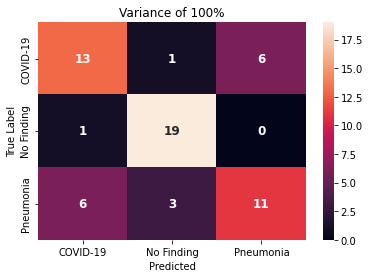

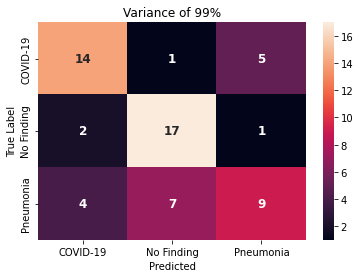

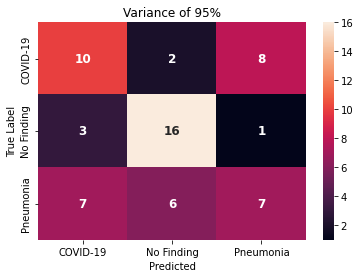

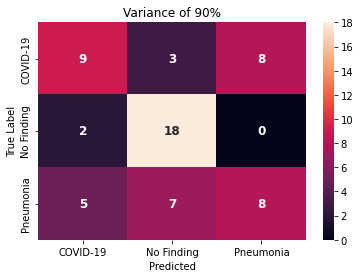

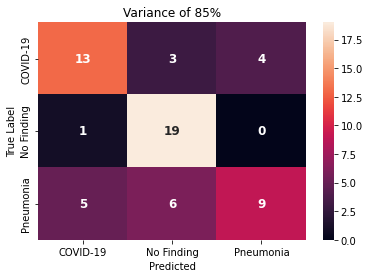

In [54]:
#Display Confusion Matrix
#Credits: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


for conf_idx in range(len(results)):
    conf_matrix = confusion_matrix(test_lbl, results[conf_idx])
    df_cm = pd.DataFrame(
        conf_matrix, index=['COVID-19', 'No Finding', 'Pneumonia'], columns=['COVID-19', 'No Finding', 'Pneumonia'], 
    )
    
    heatmap = sns.heatmap(df_cm, annot=True, fmt='d', annot_kws={"fontsize": 12, "fontweight": 'bold'})
    
    plt.title(f"Variance of {variances[conf_idx]}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted")
    plt.show()

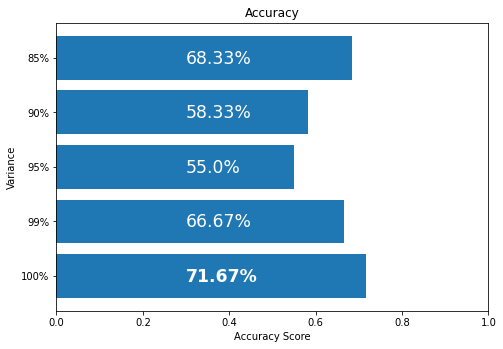

In [55]:
# For Accuracy, Precision, 
accuracies = []
threshold = -0.1

fig = plt.figure()
ax = fig.add_axes([0,1,1,1])

for i in range(len(results)):
    accuracies.append(accuracy_score(test_lbl, results[i]))
    if(i != 0):
        ax.text(0.3, threshold, str(round(accuracies[i]*100, 2)) + '%', color='white', fontsize="xx-large")
    else:
        ax.text(0.3, threshold, str(round(accuracies[i]*100, 2)) + '%', color='white', fontweight="bold", fontsize="xx-large")
    threshold = threshold + 1
    
ax.barh(variances, accuracies)
ax.set(xlim=[0, 1])
ax.set_ylabel('Variance')
ax.set_xlabel('Accuracy Score')
plt.title("Accuracy")
plt.show()

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

def getBarH(results, title="Precision", score_method='precision'):
    classes = ['COVID-19', 'Pneumonia', 'No Finding']
    variances = ["100%", "99%", "95%", "90%", "85%"]
    
    for i in range(len(variances)):
        #Set up the figure
        fig = plt.figure()
        ax = fig.add_axes([0,1,1,1])
        
        if(score_method == 'precision'):
            score = precision_score(test_lbl, results[i], average=None)
        elif (score_method == 'recall'):
            score = recall_score(test_lbl, results[i], average=None)
        else:
            score = f1_score(test_lbl, results[i], average=None)

        ax.text(0.2, -0.05, str(round(precisions[0]*100, 2)) + '%', color='white', fontsize="xx-large")
        ax.text(0.2, 0.95, str(round(precisions[1]*100, 2)) + '%', color='white', fontsize="xx-large")
        ax.text(0.2, 1.95, str(round(precisions[2]*100, 2)) + '%', color='white', fontsize="xx-large")

        ax.barh(classes, precisions)
        ax.set(xlim=[0, 1])
        ax.set_ylabel('Classes')
        ax.set_xlabel(f'{title} Score')
        plt.title(f"{title} from Variance {variances[i]}")
        plt.show()

In [60]:
# saving model as a pickle
import pickle

pickle.dump(ldas[0], open("lda-model.sav", "wb"))
pickle.dump(scaler ,open("scaler.sav", "wb"))

In [58]:
ldas[0].predict([[-0.48231438,  0.42992673, 0.0154251,   0.29257862, -0.3830666,0.25990075, 0.63592527, -0.37783398, 0.43050849, -0.16907024,  0.07501076,  0.02934443,-0.08473758,  0.29375144, -0.08993198,  0.06161358, -0.60161237, -0.12212491,0.00257537,  0.14930108, -0.58824476,  0.1515858,   0.16866041, -0.07909171,-0.59945148, -0.8671547, 0.69243669,  0.78502491, -0.04416007, -0.49783412,-0.31793285,  0.52896274, -0.32316238,  0.08112795, -0.48196302, -0.07125262,-0.39003981, -0.0150658, -0.28319971, -0.02559746, -0.22818335,  0.31465958,-0.41379718,  0.55077777, -0.35976318,  0.01836103, -0.20040167, -1.19788475,0.53230417, -0.10990929,  0.34275634,  1.02647442, -0.60931445, -0.2648355,-0.19705319,  0.13290763, -0.36600658,  0.10771264, -0.17322153, -0.04604646,0.75501779, -0.54413131,  2.18675591, -0.83000225,  0.28129641, -0.91246391,-0.68529862, -0.09694925, -0.80857593, -0.3186215,  -0.49368449, -0.3175749,0.16568241, -0.39996422, -0.35886674,  0.67356809,  0.56546233, -0.38782379,-0.0666942, -0.11003638]])

array(['COVID-19'], dtype='<U10')

In [59]:
pca_fit[0]["fit"].n_components_

59